<a href="https://colab.research.google.com/github/mmccleeseschool/Intro-to-machine-Learning/blob/main/McCleese_Homework_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 4096)                │      13,111,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,711,498 (52.31 MB)

 Trainable params: 13,711,498 (52.31 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 407s 480ms/step - accuracy: 0.7806 - loss: 0.5954 - val_accuracy: 0.8733 - val_loss: 0.3363
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 438s 476ms/step - accuracy: 0.8943 - loss: 0.2820 - val_accuracy: 0.8992 - val_loss: 0.2781
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 397s 470ms/step - accuracy: 0.9163 - loss: 0.2275 - val_accuracy: 0.8960 - val_loss: 0.2837
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 447s 476ms/step - accuracy: 0.9274 - loss: 0.1900 - val_accuracy: 0.9155 - val_loss: 0.2398
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 405s 480ms/step - accuracy: 0.9405 - loss: 0.1567 - val_accuracy: 0.9095 - val_loss: 0.2645
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.9019 - loss: 0.2962
Test Loss: 0.2851148545742035
Test Accuracy: 0.9042999744415283
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step
0: 0.0000000075%
1: 0.0000000087%
2: 0.0000000123%
3: 0.0000001111%
4: 0.0000000090%
5: 0.0001895446%
6: 0.0000000104%
7: 0.0028173050%
8: 0.0000000541%
9: 99.99

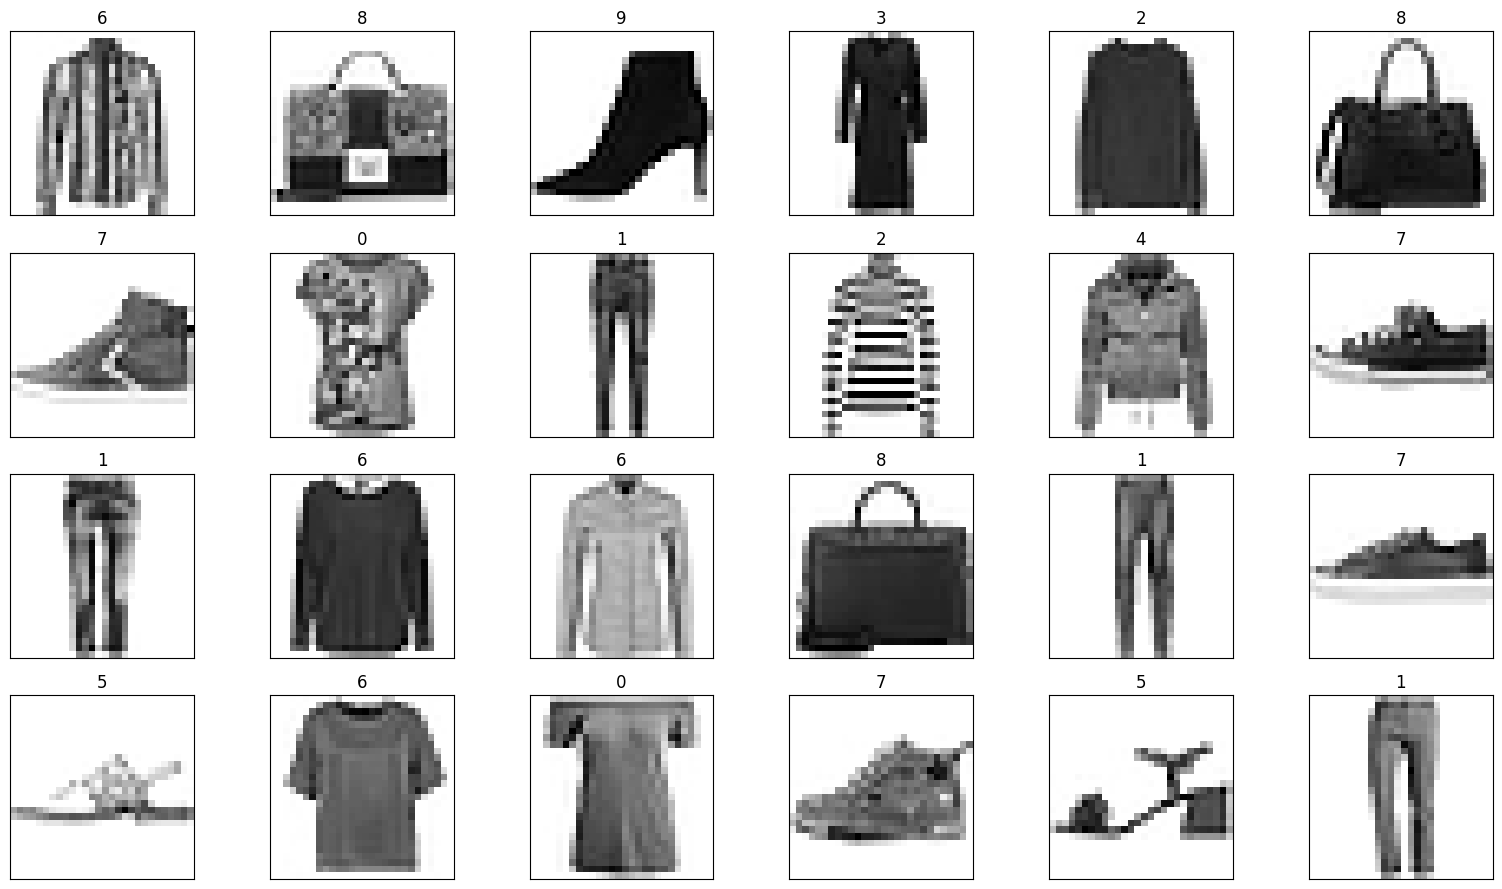

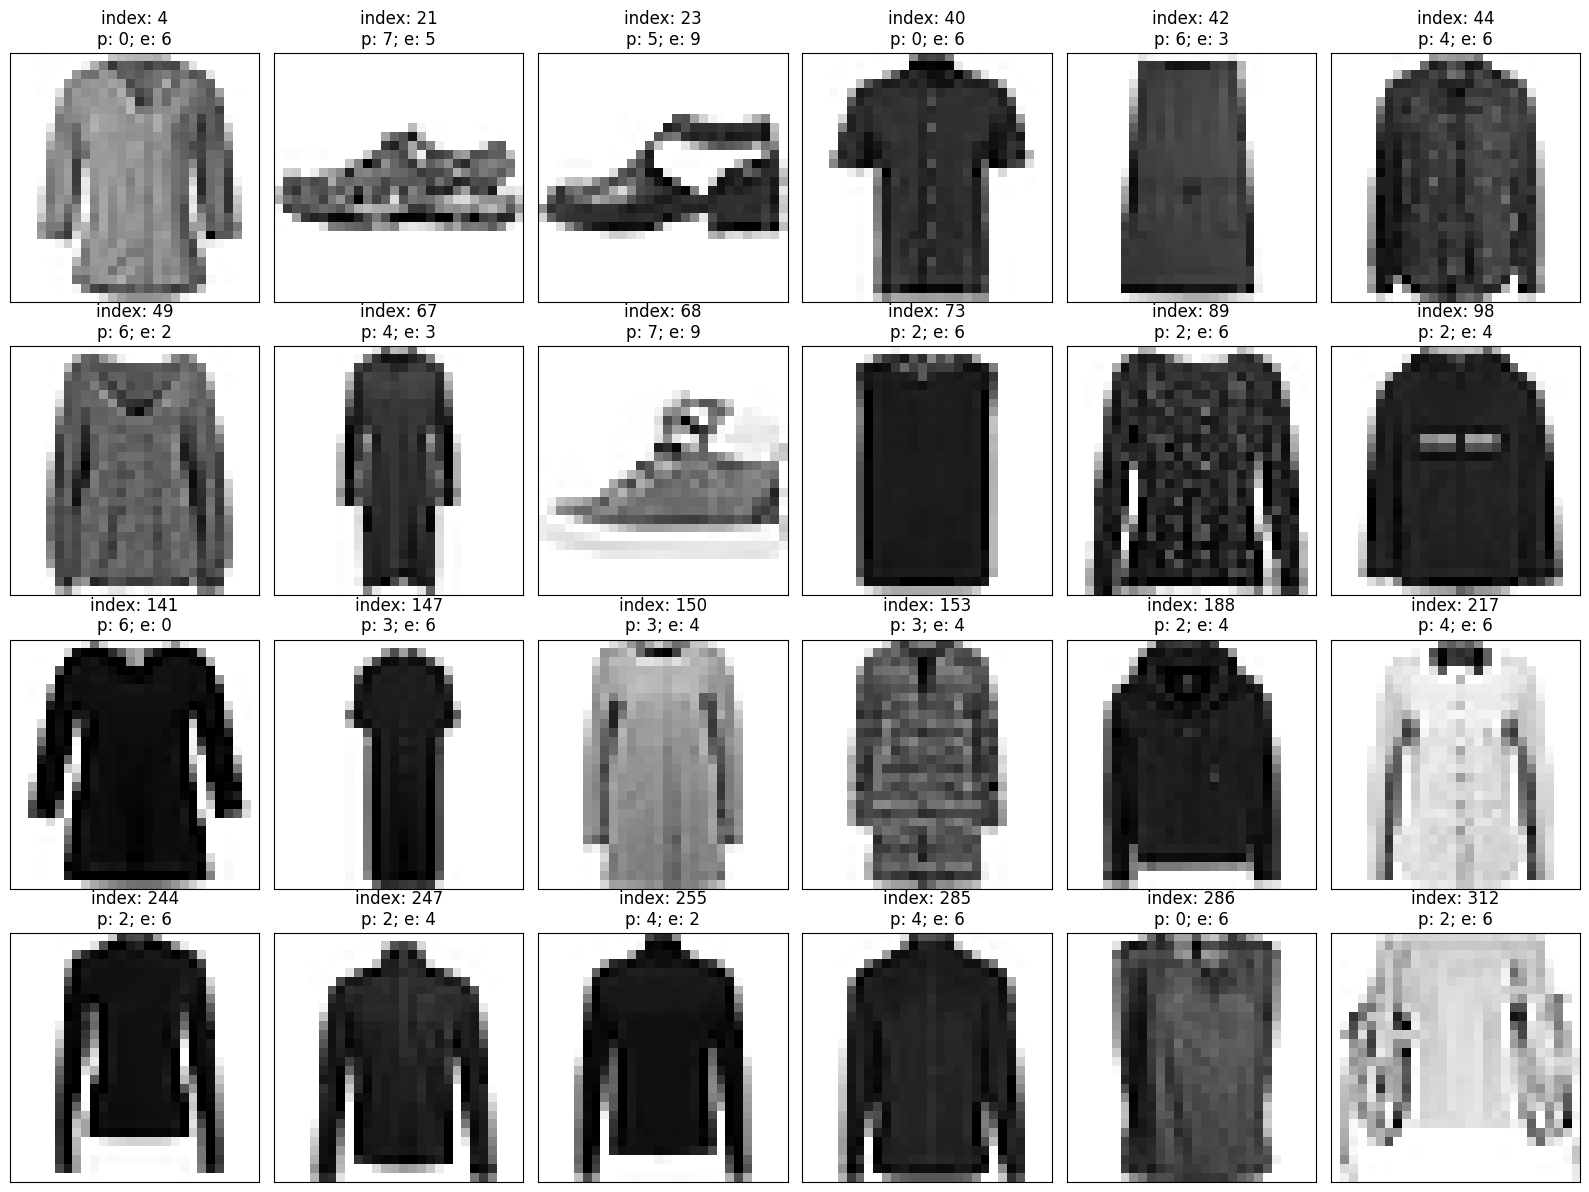

In [22]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
# sns.set(font_scale=2)

import numpy as np


index = np.random.choice(np.arange(len(X_train)), 24, replace=False) # 24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
  axes, image, target = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(target)
plt.tight_layout()


X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

X_train.shape, X_test.shape

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train.shape, y_test.shape

from tensorflow.keras.models import Sequential

cnn = Sequential()

from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

cnn.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters = 128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(units=4096, activation='relu'))

cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))



cnn.summary()

from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(cnn, to_file='convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='convnet.png')

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

loss, accuracy= cnn.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

predictions = cnn.predict(X_test)
for index, probability in enumerate(predictions[0]):
  print(f'{index}: {probability:.10%}')

images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
  predicted, expected = np.argmax(p), np.argmax(e)

  if predicted != expected:
    incorrect_predictions.append((i, images[i], predicted, expected))

len(incorrect_predictions)

figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
  index, image, predicted, expected = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()
